# Goals and objective
Goals and objective in this project is to look at fatality rate around the world and compare total case around south east asia.

In [1]:
import json
import numpy as np
import pandas as pd
import requests

# Data Preparation I
In this project we will use data from link: https://covid19-api.org

In [2]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None

In [3]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
# Check the data
print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


Fix the date time format.

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime (df_covid_worldwide['last_update'], format= '%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x:x)

In [5]:
# Check the data
df_covid_worldwide

,country,last_update,cases,deaths,recovered
0,US,2020-08-16 23:27:50,5401167,170019,1833067
1,BR,2020-08-16 23:27:50,3340197,107852,2655017
2,IN,2020-08-16 23:27:50,2589682,49980,1862258
3,RU,2020-08-16 23:27:50,920719,15653,731444
4,ZA,2020-08-16 23:27:50,587345,11839,472377
...,...,...,...,...,...
201,GG,2020-03-17 18:33:03,0,0,0
202,GL,2020-03-19 09:33:04,0,0,0
203,GU,2020-03-18 19:14:33,0,0,0
204,JE,2020-03-17 18:33:03,0,0,0


In [6]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [7]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country         last_update  ...  recovered                      name
0      US 2020-08-16 23:27:50  ...    1833067  United States of America
1      BR 2020-08-16 23:27:50  ...    2655017                    Brazil
2      IN 2020-08-16 23:27:50  ...    1862258                     India
3      RU 2020-08-16 23:27:50  ...     731444        Russian Federation
4      ZA 2020-08-16 23:27:50  ...     472377              South Africa

[5 rows x 6 columns]


Create 'fatality_ratio' column using 'deaths' column divided by column 'cases'.

In [8]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [9]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

# Visualization I
Visualize top 20 highest fatality rate countries.

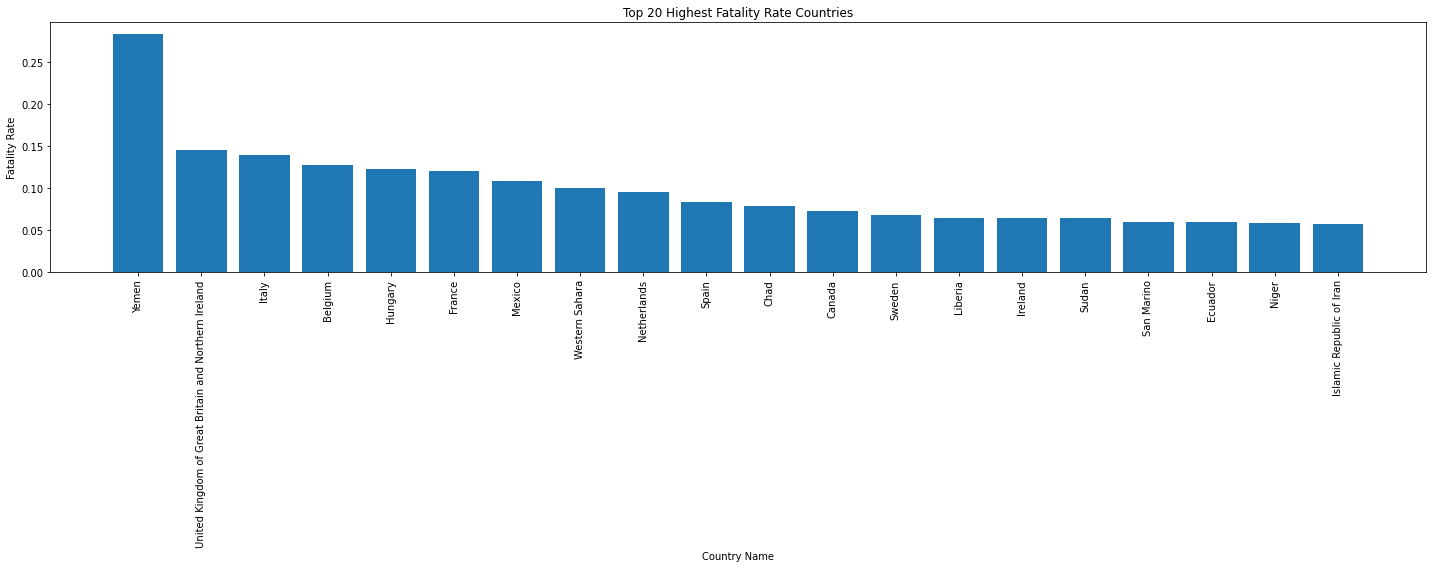

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()

# Data Preparation II
prepare data from Indonesia and 4 other southeast asia country.

In [11]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

print(df_covid_timeline_merged.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-12-16   1405      35       1252
1      VN  2020-12-15   1405      35       1252
2      VN  2020-12-14   1402      35       1246
3      VN  2020-12-13   1397      35       1241
4      VN  2020-12-12   1395      35       1238


In [21]:
df_covid_timeline_merged

,country,last_update,cases,deaths,recovered
0,VN,2020-12-16,1405,35,1252
1,VN,2020-12-15,1405,35,1252
2,VN,2020-12-14,1402,35,1246
3,VN,2020-12-13,1397,35,1241
4,VN,2020-12-12,1395,35,1238
...,...,...,...,...,...
1523,ID,2020-03-10,27,0,2
1524,ID,2020-03-09,19,0,0
1525,ID,2020-03-08,6,0,0
1526,ID,2020-03-06,4,0,0


The 'df_covid_timeline' merged with df countries with the country column as the pivot.

In [12]:

df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

# Visualization II

Compare total cases COVID 19 in indonesia against 4 other country in southeast asia.

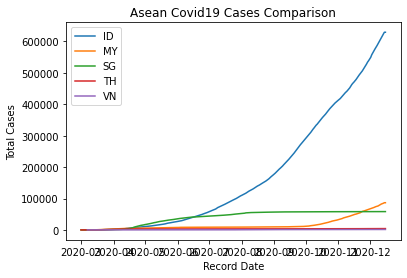

In [19]:

import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
  country_data = df_covid_timeline_denormalized['country']==country
  x = df_covid_timeline_denormalized[country_data]['last_update']
  y = df_covid_timeline_denormalized[country_data]['cases']
  plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()